In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = [15, 12]

In [3]:
df = pd.read_csv('dataset.csv')
df

,ParticipantID,HB,RBC,RET%,RDW-SD,RDW-CV,OFF-HR,LFR,IRF,MFR,HFR
0,1,14.21,5.07,0.89,41.30,13.46,86.21,91.94,8.03,7.16,0.81
1,1,13.96,4.56,0.96,42.46,12.74,81.24,93.08,7.00,6.39,0.51
2,1,14.72,5.13,0.85,41.64,13.16,92.67,89.95,10.04,9.40,0.71
3,1,13.89,4.79,0.92,44.04,13.86,81.53,86.74,13.27,11.79,1.33
4,1,15.42,4.77,1.07,43.28,12.47,92.19,94.42,5.58,4.71,0.75
...,...,...,...,...,...,...,...,...,...,...,...
816,30,14.55,4.81,0.73,37.68,11.81,94.94,95.47,4.60,4.27,0.27
817,30,15.02,5.00,0.87,40.39,12.62,94.10,96.16,3.84,3.55,0.31
818,30,15.34,5.32,1.50,36.51,12.15,79.26,93.35,6.77,6.13,0.54
819,30,15.63,5.19,1.03,38.46,12.14,95.73,93.71,6.38,5.69,0.63


In [4]:
# statistical summary of numerical columns
df.describe()

,ParticipantID,HB,RBC,RET%,RDW-SD,RDW-CV,OFF-HR,LFR,IRF,MFR,HFR
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,16.844093,14.173325,4.692619,1.087272,41.283520,12.692400,80.055591,92.459269,7.541815,6.642436,0.866066
std,7.594771,1.093185,0.369755,0.374530,2.046512,0.591592,14.008454,3.353213,3.364986,2.806649,0.732048
min,1.000000,10.840000,3.510000,0.210000,35.070000,10.870000,29.220000,80.620000,-0.720000,-0.640000,-0.400000
25%,11.000000,13.520000,4.480000,0.840000,40.010000,12.310000,70.230000,90.180000,5.170000,4.740000,0.390000
50%,17.000000,14.170000,4.670000,0.990000,41.190000,12.570000,80.460000,93.050000,6.920000,6.160000,0.670000
75%,23.000000,14.950000,4.970000,1.270000,42.480000,13.060000,90.650000,94.830000,9.840000,8.490000,1.220000
max,30.000000,16.950000,5.520000,2.500000,48.120000,15.340000,118.240000,100.660000,19.510000,16.820000,3.600000


## Box plot

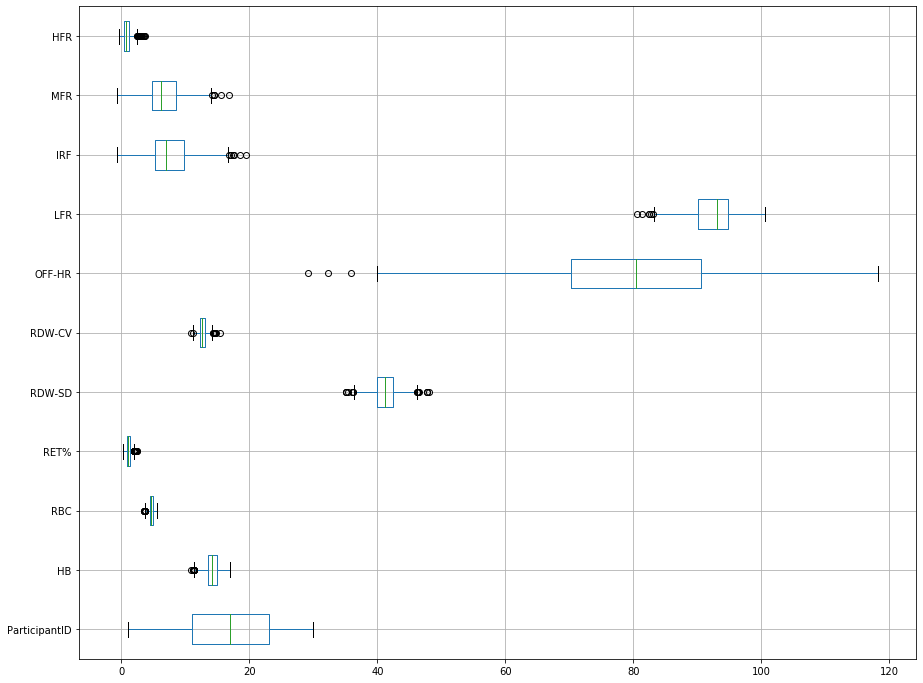

In [5]:
df.plot.box(vert=False, grid=True)

### Observations:
** OFF-HR ** has large range of values but very few outliers. <br>
**MFR, IFR, LFR, RDW-SD and OFF-HR ** has relatively large range of values than other attributes.



### Histogram

/home/nikhil/.virtualenvs/pytorch/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


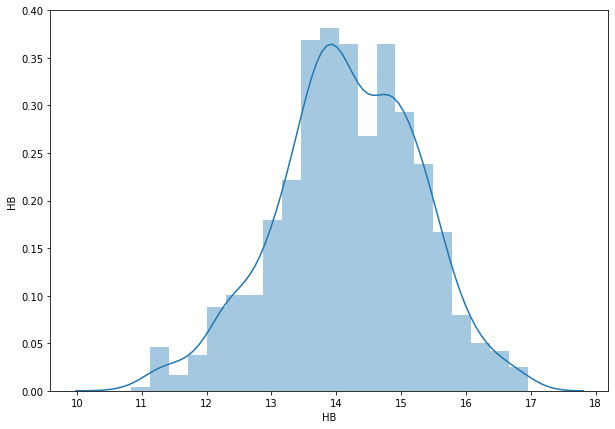

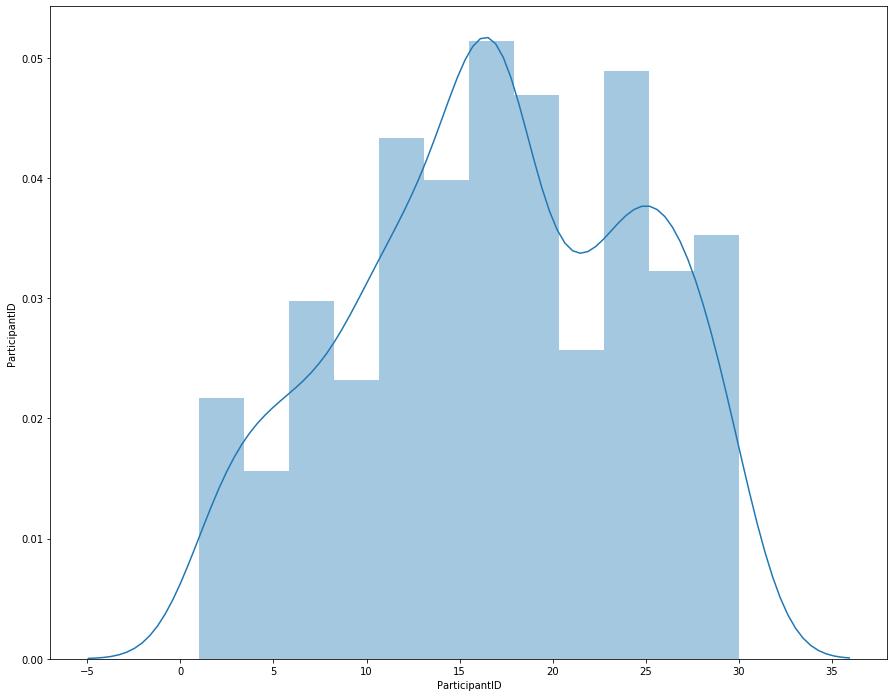

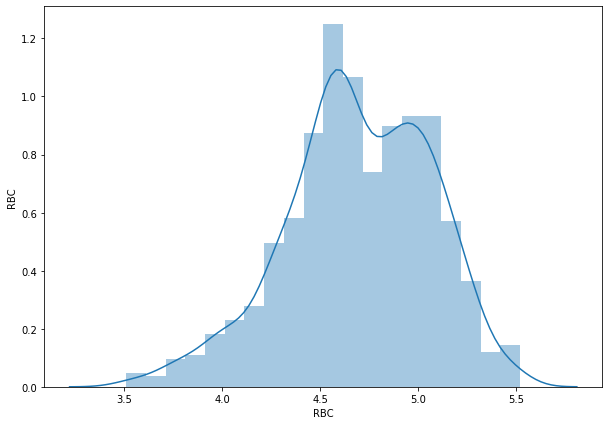

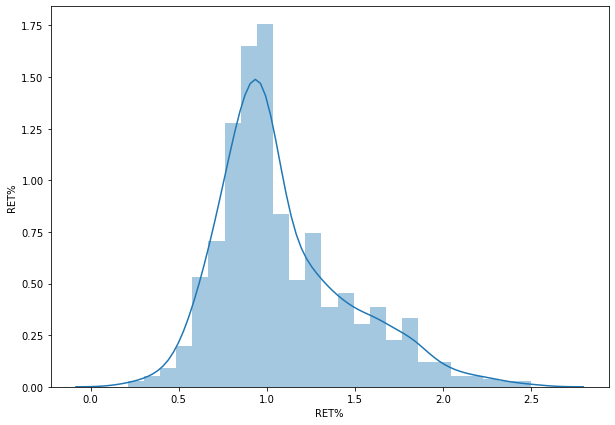

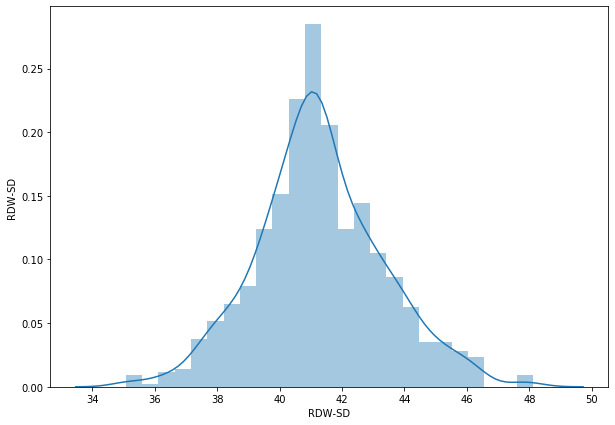

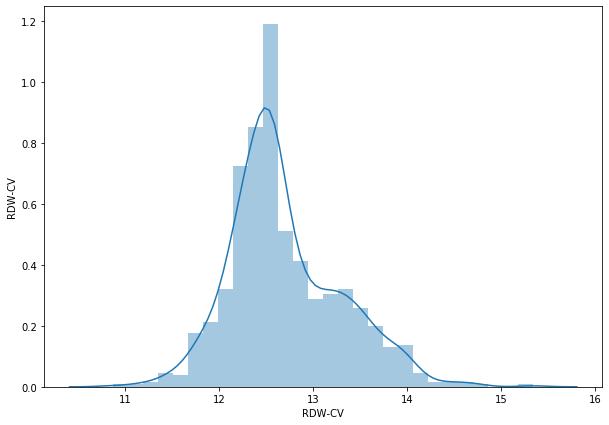

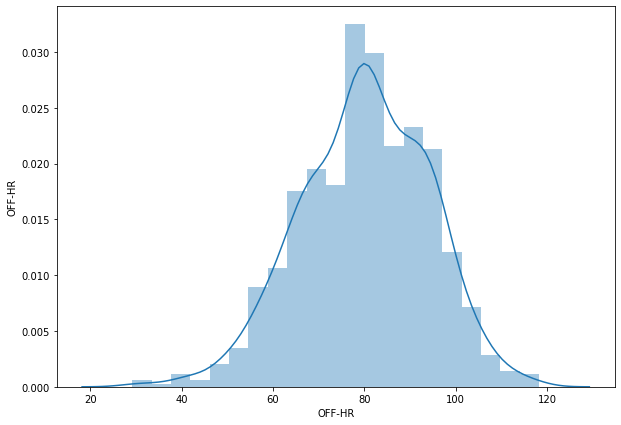

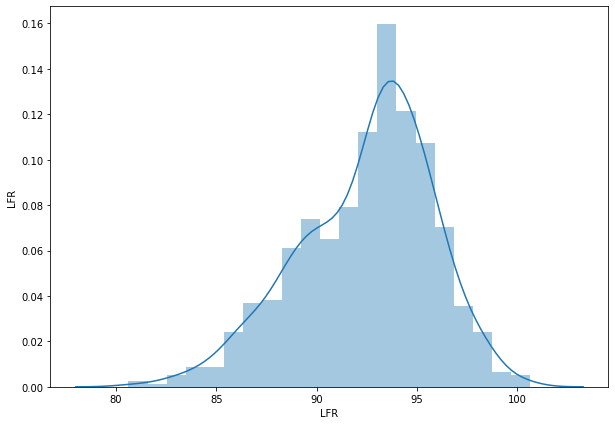

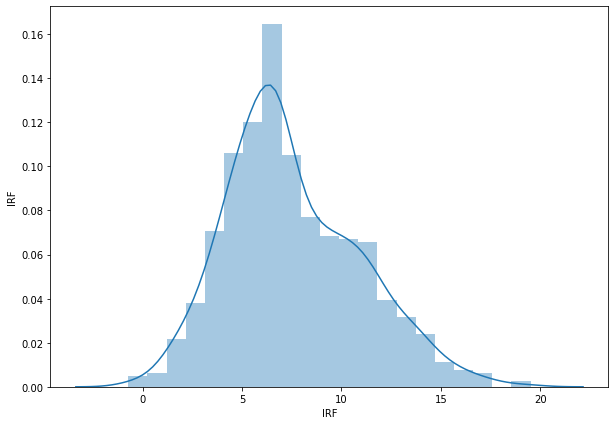

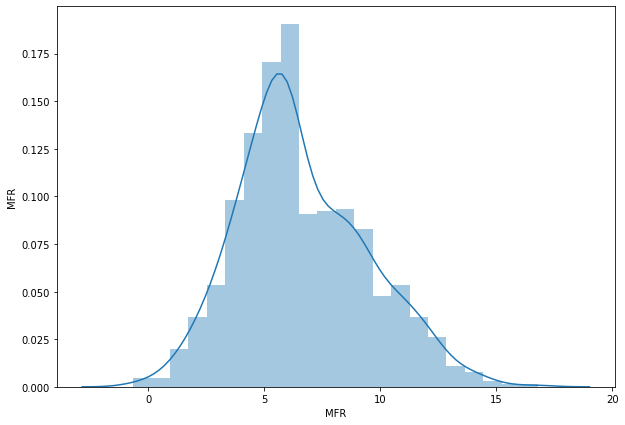

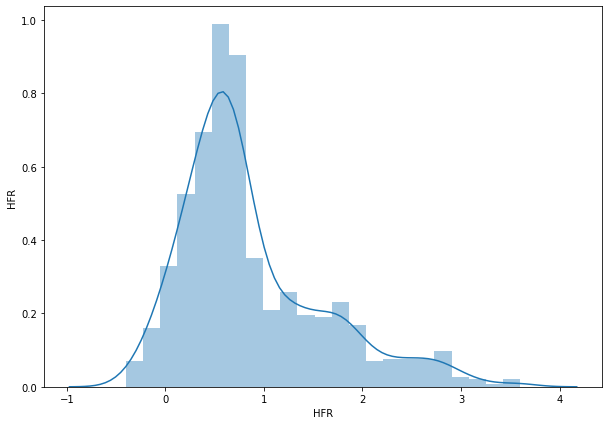

<Figure size 720x504 with 0 Axes>

In [6]:
# HISTOGRAM
n_plt = df.shape[1]
# fig, axes = plt.subplot(n_plt)
idx = 0

for name, values in df.iteritems():
    plt.figure(figsize=(10,7))
    plt_fig = plt.figure(idx); idx += 1
    sns.distplot(values)
    plt.ylabel(name)

plt.show()



### Observations

** OFF-HR ** has a more symmetric distributions. <br>
** HB** and **RCB ** are bimodal distributions. <br>
Others shows trend more unimodel with little skewness towards left or right

## Correlation matrix

In [7]:
# tell how column features are related to each other
corr = df.iloc[:,1:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,HB,RBC,RET%,RDW-SD,RDW-CV,OFF-HR,LFR,IRF,MFR,HFR
HB,1,0.9,0.16,-0.33,-0.28,0.66,-0.0018,0.0052,0.0042,-0.0028
RBC,0.9,1,0.043,-0.39,-0.062,0.67,-0.027,0.029,0.031,0.0028
RET%,0.16,0.043,1,0.21,0.13,-0.63,-0.61,0.61,0.59,0.49
RDW-SD,-0.33,-0.39,0.21,1,0.73,-0.41,-0.37,0.36,0.36,0.33
RDW-CV,-0.28,-0.062,0.13,0.73,1,-0.31,-0.37,0.37,0.36,0.32
OFF-HR,0.66,0.67,-0.63,-0.41,-0.31,1,0.46,-0.46,-0.45,-0.37
LFR,-0.0018,-0.027,-0.61,-0.37,-0.37,0.46,1,-1,-0.99,-0.77
IRF,0.0052,0.029,0.61,0.36,0.37,-0.46,-1,1,0.99,0.77
MFR,0.0042,0.031,0.59,0.36,0.36,-0.45,-0.99,0.99,1,0.66
HFR,-0.0028,0.0028,0.49,0.33,0.32,-0.37,-0.77,0.77,0.66,1


### Obserations
** HB ** and **RBC** are highly correlated - more dependence - redundant information <br>
** MFR ** and **IRF** are highly correlated - more dependence - redundant information <br>
Some notable correlation exist between **IRF** and **HFR**, **MRF** and **HFR**, **RET%** and **IFR** 


## Scatter Plot


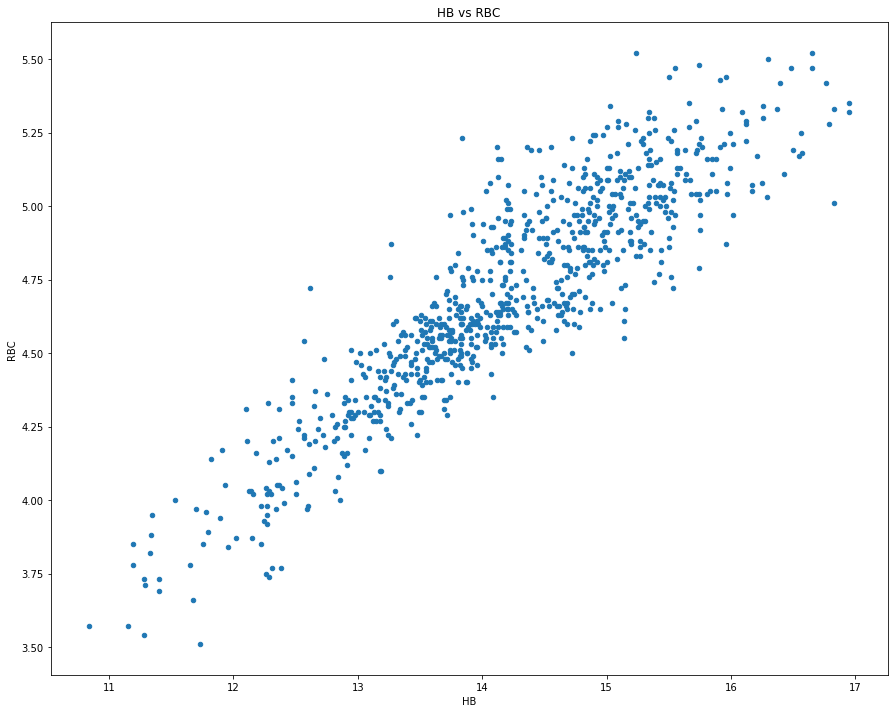

In [8]:
# We will see trends between correlating features
df.plot.scatter(x='HB', y='RBC',title='HB vs RBC')

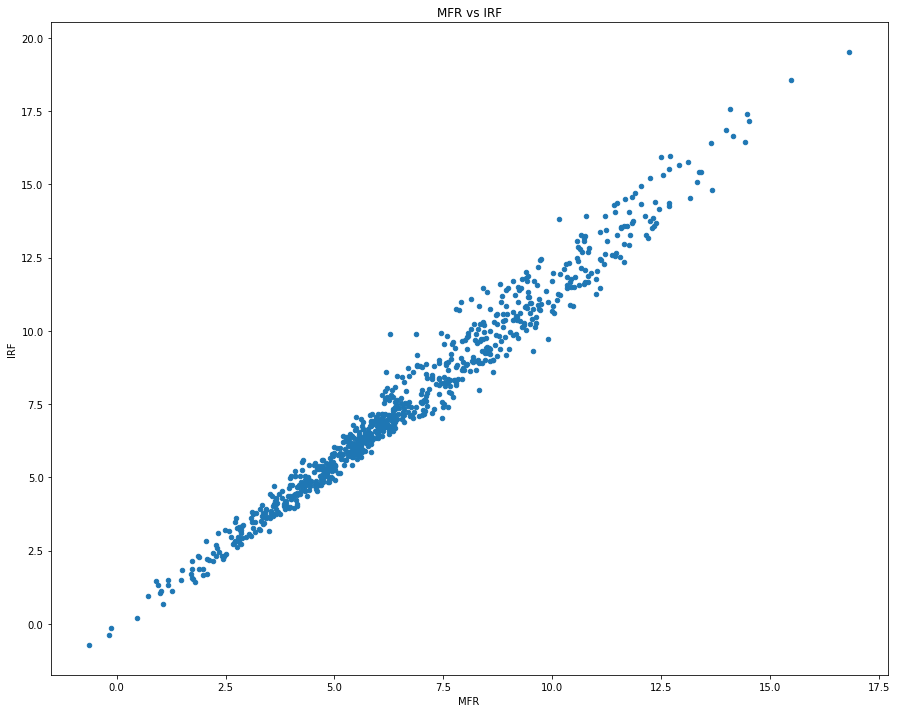

In [9]:
df.plot.scatter(x='MFR', y='IRF',title='MFR vs IRF')

### Analysing profiles w.r.t participants

In [30]:
df_part_cnt = df.groupby('ParticipantID').count()
df_part_cnt.iloc[:,:1]

,HB
ParticipantID,
1,8
2,17
3,18
4,12
5,19
6,22
7,13
8,24
9,17


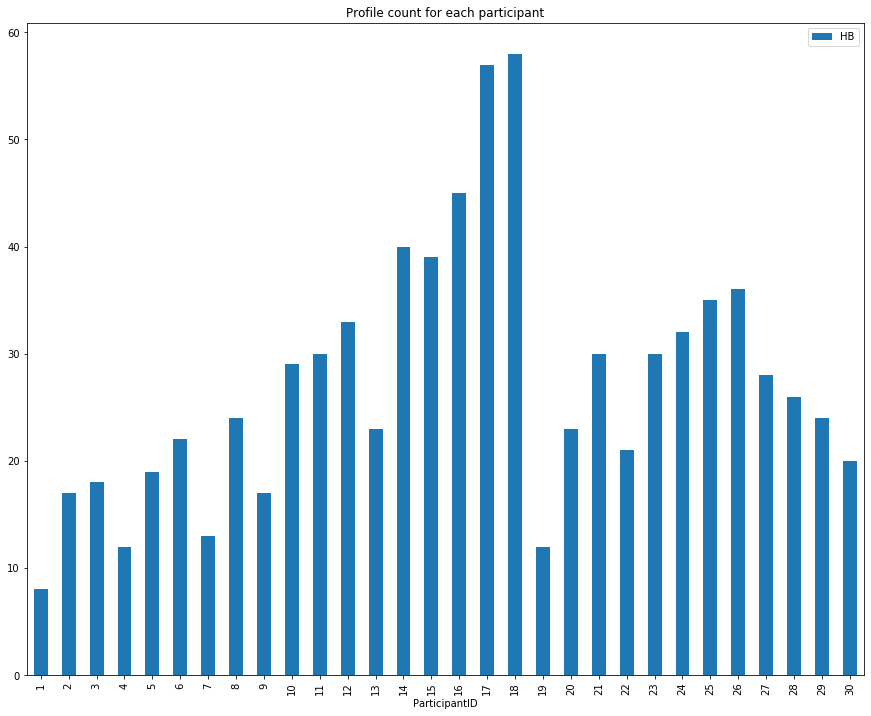

In [27]:
df_part_cnt.plot.bar(y='HB', title='Profile count for each participant')

In [15]:
# Aggregating columns for each participant
df_agg = df.groupby('ParticipantID').mean()
df_agg

,HB,RBC,RET%,RDW-SD,RDW-CV,OFF-HR,LFR,IRF,MFR,HFR
ParticipantID,,,,,,,,,,
1,14.276250,4.762500,1.052500,42.741250,13.177500,82.081250,91.181250,8.850000,7.658750,1.140000
2,14.544118,4.781765,0.832353,41.069412,12.587647,91.345294,94.284118,5.659412,5.204706,0.515882
3,14.168889,4.671111,1.008889,41.252222,12.622222,82.289444,93.467778,6.523333,5.855000,0.670556
4,14.635000,4.906667,1.010833,41.910000,12.885833,87.033333,90.976667,9.017500,7.990000,1.051667
5,14.077895,4.748421,0.834211,41.455263,12.945263,86.558947,93.270000,6.712105,6.031053,0.699474
6,14.646364,4.800909,1.085000,41.464091,12.655000,84.756818,92.433636,7.573636,6.798182,0.767727
7,14.300769,4.805385,1.113077,41.980000,13.032308,80.514615,92.166923,7.841538,7.030000,0.776154
8,14.595000,4.843333,0.996667,41.512917,12.940417,86.855000,93.582917,6.408333,5.711250,0.657500
9,14.347647,4.773529,1.032353,41.719412,12.882353,83.513529,92.508235,7.491176,6.609412,0.838824


In [16]:
# correlation between participants profiles
cor2 = df_agg.T.corr()
cor2.style.background_gradient(cmap='coolwarm').set_precision(2)

ParticipantID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
ParticipantID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,0.99,1,0.99,0.99,0.99,0.99,0.99,0.99,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,0.99,0.99,1,0.99,1,0.99,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,1,0.99,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,1,0.99,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,1,0.99,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.99,1,1,1,1,1,1,1,1,1,1,1


### Observations (Over mean values)
* Participants 1-15 are highly correlated with 1-15 group. Thus it would be difficult to distinguish between them.
* Participants 16-28 are slightly less correlated.
* Overall the correlation is high between mean profile values for each participant.